### Python Chilla Pandas Assignment
> **Title= "Mr"**\
> **Name= "Ali Nawaz"**\
> **email = "nawazktk99@gmail.com"**\
> **whatsapp = "03358043653"**\
> **Artificial Intelligence Engineer at NUST**\
> **Education : Master in Software Engineering**

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# adding all col and make mean in new col
df = pd.DataFrame(np.random.randn(10,4), columns=list('ABCD'))
df['average'] = df.mean(axis=1)
# other method
# df['average'] = df[['col1', 'col2']].mean(axis=1)
# col = df.loc[: , "col1":"col3"]
# df['mean'] = col.mean(axis=1)
df

,A,B,C,D,average
0,0.394691,-0.099034,1.221874,-0.034684,0.370712
1,0.618873,-1.062932,1.421820,0.947714,0.481369
2,-0.035818,0.714579,-0.759874,0.402847,0.080434
3,0.034415,-0.931410,0.049617,-0.153396,-0.250194
4,-0.312452,0.553099,1.468710,-0.653885,0.263868
5,-0.086214,-2.664909,-1.171882,-1.606185,-1.382297
6,-0.563718,-0.888630,0.337625,1.152865,0.009536
7,0.544186,-1.112088,0.047404,0.248578,-0.067980
8,0.044452,-0.103955,-0.215611,0.680726,0.101403
9,0.820109,-0.677758,-0.080284,-0.367010,-0.076236


## Pakistan vs India Cereals, total production Data Plots and variation

In [3]:
pak = pd.read_csv("D:/Python ka Chilla/python_chilla/data/production_faost_data_pak.csv")
ind = pd.read_csv("D:/Python ka Chilla/python_chilla/data/production_faost_data_india.csv")
pak.head(3)



,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,165,Pakistan,5312,Area harvested,1717,"Cereals, Total",1961,1961,ha,7858558,A,"Aggregate, may include official, semi-official..."
1,QCL,Crops and livestock products,165,Pakistan,5419,Yield,1717,"Cereals, Total",1961,1961,hg/ha,8564,Fc,Calculated data
2,QCL,Crops and livestock products,165,Pakistan,5510,Production,1717,"Cereals, Total",1961,1961,tonnes,6729680,A,"Aggregate, may include official, semi-official..."


### Pakistan Data Analysis

In [4]:
print(pak.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       180 non-null    object
 1   Domain            180 non-null    object
 2   Area Code         180 non-null    int64 
 3   Area              180 non-null    object
 4   Element Code      180 non-null    int64 
 5   Element           180 non-null    object
 6   Item Code         180 non-null    int64 
 7   Item              180 non-null    object
 8   Year Code         180 non-null    int64 
 9   Year              180 non-null    int64 
 10  Unit              180 non-null    object
 11  Value             180 non-null    int64 
 12  Flag              180 non-null    object
 13  Flag Description  180 non-null    object
dtypes: int64(6), object(8)
memory usage: 19.8+ KB
None


In [5]:
# drop all rows with Nan values
pak = pak.dropna()
pak.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,165,Pakistan,5312,Area harvested,1717,"Cereals, Total",1961,1961,ha,7858558,A,"Aggregate, may include official, semi-official..."
1,QCL,Crops and livestock products,165,Pakistan,5419,Yield,1717,"Cereals, Total",1961,1961,hg/ha,8564,Fc,Calculated data
2,QCL,Crops and livestock products,165,Pakistan,5510,Production,1717,"Cereals, Total",1961,1961,tonnes,6729680,A,"Aggregate, may include official, semi-official..."
3,QCL,Crops and livestock products,165,Pakistan,5312,Area harvested,1717,"Cereals, Total",1962,1962,ha,8090856,A,"Aggregate, may include official, semi-official..."
4,QCL,Crops and livestock products,165,Pakistan,5419,Yield,1717,"Cereals, Total",1962,1962,hg/ha,8580,Fc,Calculated data


In [6]:
pak[pak['Value']>9000000].groupby(['Area', 'Item']).mean()


,,Area Code,Element Code,Item Code,Year Code,Year,Value
Area,Item,,,,,,
Pakistan,"Cereals, Total",165.0,5410.074766,1717.0,1993.747664,1993.747664,1.856807e+07


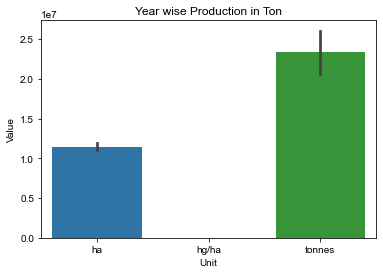

In [7]:
sns.barplot(x='Unit', y = "Value", data=pak, saturation=0.8)
sns.set_style('dark')
plt.title("Year wise Production in Ton")
plt.show()

In [12]:
fig = px.pie(pak, values='Year', names='Flag', title='Pie Chart for The Crop Production Based on their Flag ')
fig.show()

In [16]:
pak.head(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,165,Pakistan,5312,Area harvested,1717,"Cereals, Total",1961,1961.0,ha,7858558.0,A,"Aggregate, may include official, semi-official..."


In [20]:
fig = px.sunburst(pak, path=['Area', 'Item'], values='Value',
                  color='Year', hover_data=['Unit'])
fig.show()

In [23]:
fig = px.bar(pak, x="Element", y="Value", color="Unit",
             pattern_shape="Unit", pattern_shape_sequence=[".", "x", "+"])
fig.show()

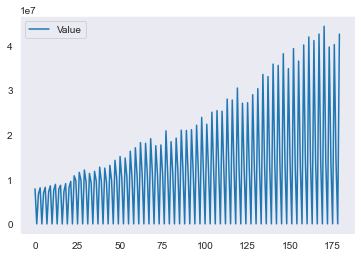

In [15]:
# plots for individual crops
pak['Value'] = pak['Value'].astype(float)
pak['Year'] = pak['Year'].astype(float)
pak['Value'].plot()

plt.legend(loc='upper left')

In [23]:
# checking columns of dataframe
print(pak.columns)


Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')


# Kashti Dataset Usecase

In [25]:
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [28]:
df.to_csv('D:/Python ka Chilla/python_chilla/data/titanic', index=False)

In [29]:
dff = df.drop(['sibsp', 'embarked'], axis=1)
dff.head()

,survived,pclass,sex,age,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,0,53.1000,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Third,man,True,NaN,Southampton,no,True


In [30]:
dff.describe()

,survived,pclass,age,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.381594,32.204208
std,0.486592,0.836071,14.526497,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,6.000000,512.329200


In [31]:

dff.mean()

survived       0.383838
pclass         2.308642
age           29.699118
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [32]:
dff.value_counts(['survived'])

survived
0           549
1           342
dtype: int64

In [36]:
# dff.groupby(['sex', 'class']).mean()
dff.groupby(['sex']).mean()

In [38]:
dff[dff['age']>18].groupby(['sex', 'class']).mean()

survived  pclass        age     parch        fare  adult_male  \
sex    class                                                                   
female First   0.972973     1.0  37.500000  0.418919  105.043469         0.0   
       Second  0.900000     2.0  33.158333  0.500000   21.224653         0.0   
       Third   0.423729     3.0  30.161017  0.983051   14.785453         0.0   
male   First   0.375000     1.0  42.901042  0.270833   68.877389         1.0   
       Second  0.071429     2.0  34.750000  0.154762   20.219593         1.0   
       Third   0.133663     3.0  30.366337  0.099010   10.022624         1.0   

                  alone  
sex    class             
female First   0.418919  
       Second  0.466667  
       Third   0.440678  
male   First   0.562500  
       Second  0.678571  
       Third   0.851485